In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#sb.color_palette("crest", as_cmap=True)

In [3]:
df = pd.read_csv('../data/oksygen/merged.csv')
df.set_index('Timestamp', inplace=True)

In [4]:
df.tail()

,Pos1m3Temp,Pos1m3DO,Pos1m6Temp,Pos1m6DO,Pos1m9Temp,Pos1m9DO,Pos1m12Temp,Pos1m12DO,Pos4m3Temp,Pos4m3DO,...,CurrentVertical32m,CurrentVertical33m,CurrentVertical34m,CurrentVertical35m,CurrentVertical36m,CurrentVertical37m,CurrentVertical38m,CurrentVertical39m,CurrentVertical40m,CurrentVertical41m
Timestamp,,,,,,,,,,,,,,,,,,,,,
07-05 10:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-05 10:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-05 10:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-05 10:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-05 10:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Timestamp'>

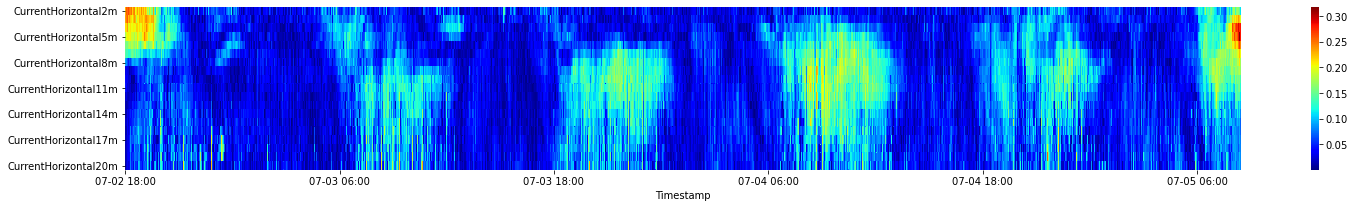

In [8]:
fig, ax = plt.subplots(figsize=(25,3))
#ax.plot(data['Pos1m3Temp'], 'b-', label='Pos1m3Temp')
#ax.set_xticklabels(rotation = (45), fontsize = 10, va='bottom', ha='left')
#ax.set_xticks(np.arange(len))
#df['NorthTemp'].plot(figsize=[10,8], rot=45)
#df.describe()
newdf = df['07-02 17:00':].loc[:,'CurrentHorizontal2m':'CurrentHorizontal20m'].dropna().transpose()
newdf.head(10)
sb.heatmap(newdf, xticklabels=720, yticklabels = 3, cmap='jet')
#df.loc[:,'CurrentDirection2m':'CurrentDirection41m'].head()

In [6]:
newdf.head()

Timestamp,07-02 17:00,07-02 17:01,07-02 17:02,07-02 17:03,07-02 17:04,07-02 17:05,07-02 17:06,07-02 17:07,07-02 17:08,07-02 17:09,...,07-05 08:34,07-05 08:35,07-05 08:36,07-05 08:37,07-05 08:39,07-05 08:40,07-05 08:41,07-05 08:43,07-05 08:44,07-05 08:45
CurrentHorizontal2m,0.272736,0.267829,0.274274,0.311979,0.292907,0.331337,0.368832,0.339890,0.301222,0.326403,...,0.171063,0.164812,0.176946,0.163276,0.147484,0.139447,0.146025,0.117972,0.131643,0.113224
CurrentHorizontal3m,0.321117,0.312949,0.324182,0.384838,0.336961,0.335088,0.359635,0.341420,0.325158,0.332207,...,0.216295,0.208364,0.233794,0.237957,0.219775,0.211484,0.223019,0.214516,0.204246,0.196097
CurrentHorizontal4m,0.375786,0.361100,0.376423,0.398101,0.368884,0.343760,0.363381,0.316632,0.305347,0.285469,...,0.270071,0.264702,0.288521,0.292159,0.283896,0.284546,0.275290,0.287897,0.278919,0.282728
CurrentHorizontal5m,0.342297,0.357100,0.320963,0.304336,0.354310,0.319601,0.360892,0.336048,0.301302,0.307220,...,0.257723,0.239997,0.278256,0.284417,0.277825,0.288052,0.318649,0.280973,0.289080,0.282734
CurrentHorizontal6m,0.236808,0.237613,0.240926,0.251684,0.282640,0.247327,0.330742,0.311088,0.297792,0.278736,...,0.216327,0.220781,0.246644,0.249741,0.233040,0.237560,0.272344,0.260741,0.248248,0.244237
